# Telecom Customer data Exploration

### Importing Libraries

To proceed with the analysis, we need to import the essential libraries. These libraries provide the necessary tools and functions to manipulate, visualize, and analyze the dataset effectively. The following libraries will be imported for this purpose.

In [1]:
# importing libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('../data/Telco-Customer-Churn-processed.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup,ChargeRatio,ServicesCount,HighRisk,PaymentMethodType
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0-1yr,29.85,1,0,Manual
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,2-5yr,55.57,3,0,Manual
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,0-1yr,54.08,3,0,Manual
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,2-5yr,40.91,3,0,Automatic
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,0-1yr,75.83,1,1,Manual


## Exploratiory Data Analysis (EDA)

In order to discover hidden insights and indentify the trends, The features will be split into 2 parts : Numerical and Categorical

In [3]:
# Dividing features into Numerical and Categorical Features
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn TenureGroup HighRisk PaymentMethodType
Numerical Features : customerID tenure MonthlyCharges TotalCharges ChargeRatio ServicesCount


### Churn Target Variable Visualization

Understanding the distribution of the target variable, `Churn` is crucial for gaining insights into customer behavior. In this visualization:

- **Churn Distribution:** We explore the distribution of churned and not-churned customers to gauge the imbalance in the dataset.

- **Visual Representation:** Utilizing graphs or charts to present a clear and concise overview of the proportion of customers who churned and those who did not.

- **Insights:** Analyzing patterns in churn distribution can reveal potential challenges and opportunities in addressing customer retention.

This visualization serves as a foundational step in comprehending the dataset's target variable, setting the stage for more in-depth analyses and modeling.

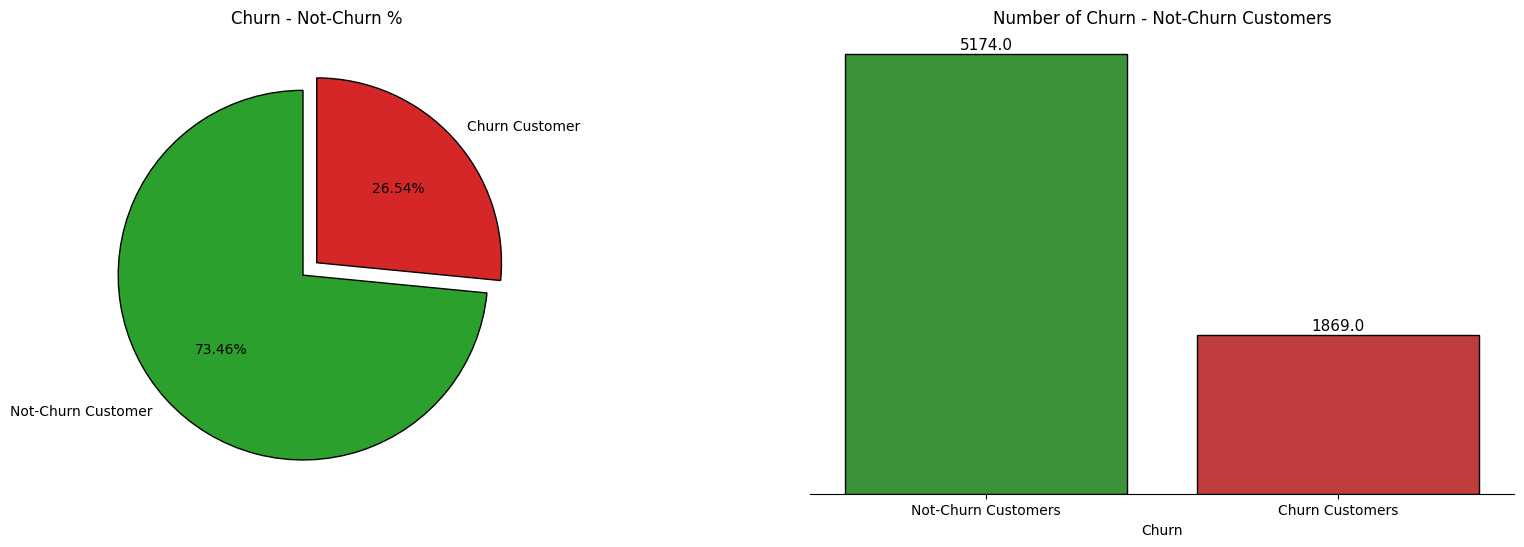

In [4]:
colors = ['#2ca02c', '#d62728'] 

l = list(df['Churn'].value_counts())
circle = [l[0] / sum(l) * 100, l[1] / sum(l) * 100]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Pie chart
axes[0].pie(circle, labels=['Not-Churn Customer', 'Churn Customer'], autopct='%1.2f%%', startangle=90, explode=(0.1, 0),
            colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
axes[0].set_title('Churn - Not-Churn %')


# Countplot
ax = sns.countplot(x='Churn', data=df, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 50, rect.get_height(),
            horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['Not-Churn Customers', 'Churn Customers'])

ax.set_title('Number of Churn - Not-Churn Customers')

# Remove y-axis and the square around the graph
ax.yaxis.set_visible(False)
sns.despine(ax=ax, left=True)

plt.show()

The dataset exhibits an imbalanced distribution, with a ratio of approximately 3:1 for Not-Churn to Churn customers. This imbalance introduces a bias in predictions, where the model may lean towards accurately predicting Not-Churn instances.

Visualizations will vividly illustrate this disparity, emphasizing the challenge posed by the skewed distribution in the dataset. Addressing this class imbalance will be a crucial consideration in subsequent modeling steps to ensure a more accurate and meaningful predictive outcome.

### Categorical Features and Their Impact on the Target Variable (Churn)

For visualization purposes, we will exclude the target variable, "Churn," from the list of categorical features. This allows for a focused examination of how other categorical attributes influence the likelihood of customer churn.

In [5]:
# divide categories into sub-category
demographic_categories = ['gender','SeniorCitizen','Partner','Dependents']
service_categories = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] 
billing_categories = ['Contract','PaperlessBilling','PaymentMethod'] 

To manage the abundance of categorical features in the dataset, we classify them into three groups based on their values or column names. This categorization aids in organizing and analyzing the features more effectively, allowing for a structured exploration of their impact on the target variable.

### Group 1: Customer Demographic Information

This category encompasses attributes related to customer demographics and characteristics:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

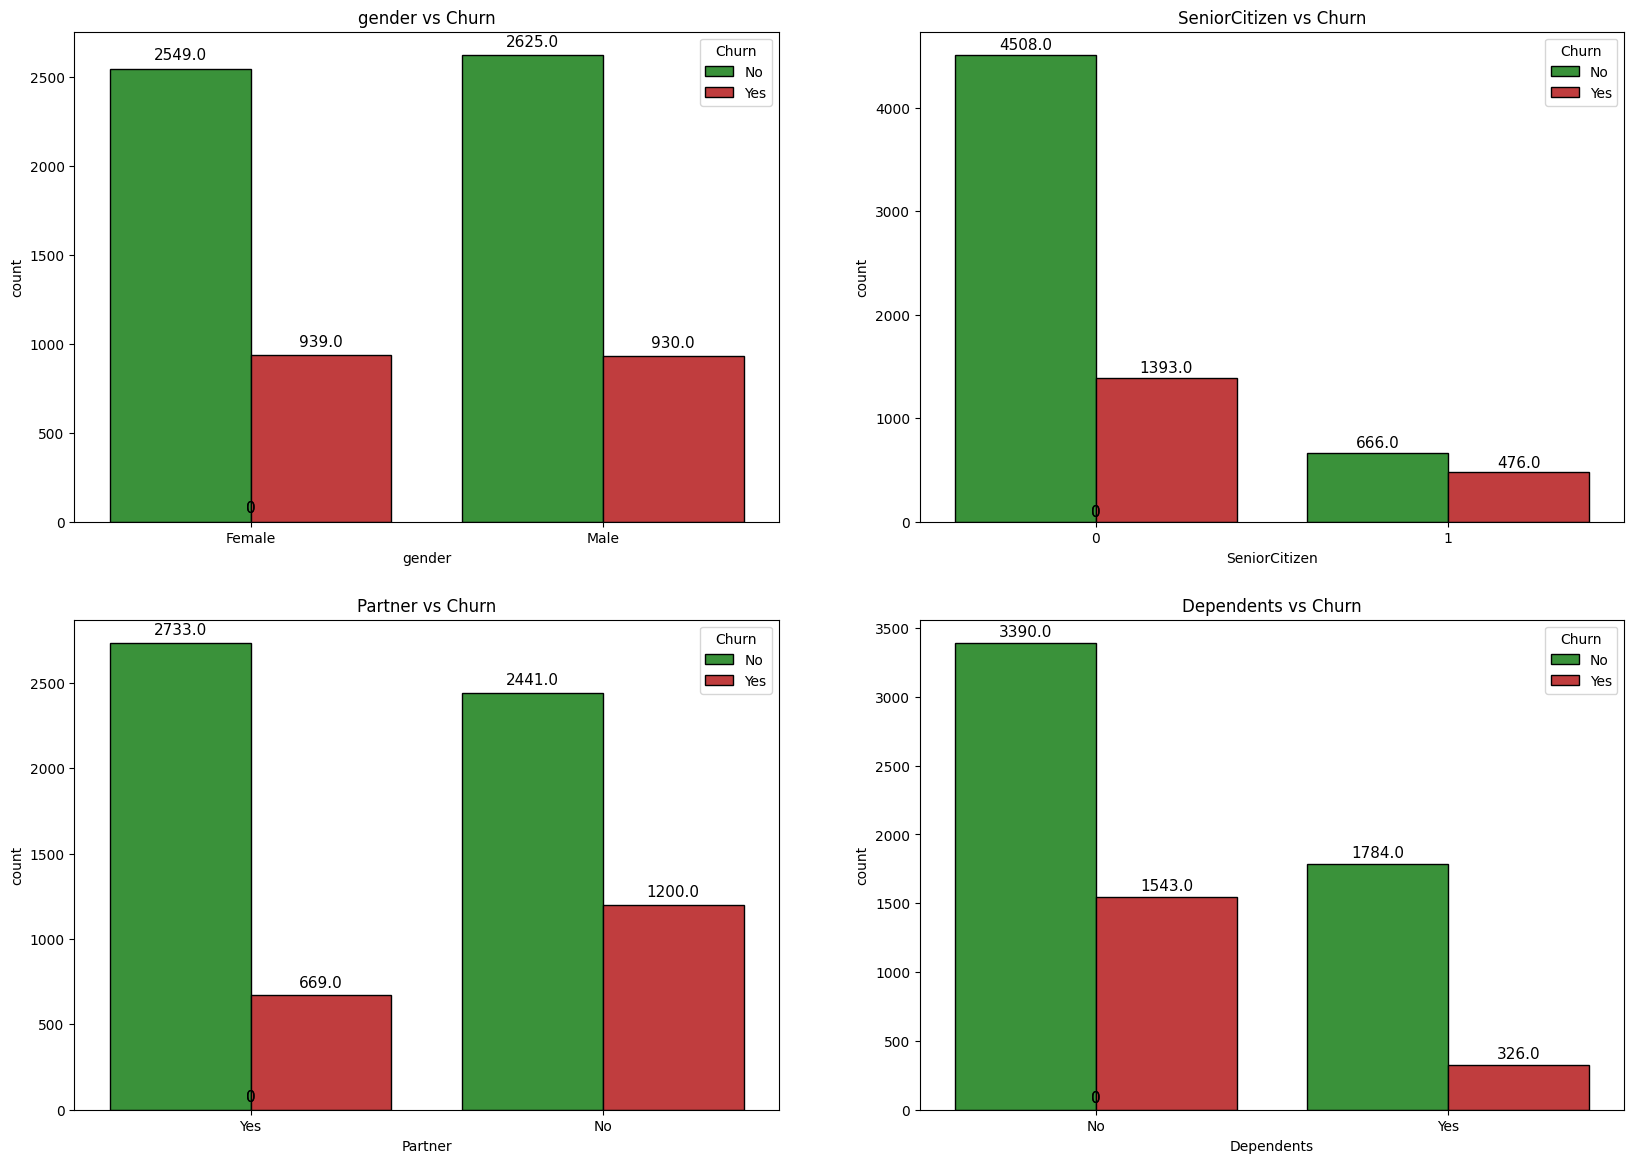

In [6]:
# ploting category with churn
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(demographic_categories)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=demographic_categories[i], data = df ,hue = "Churn", palette = colors, edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 50, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = demographic_categories[i] + ' vs Churn'
    plt.title(title)

- **Gender Churn Analysis:**
  Customer churn rates are comparable between male and female customers, indicating similarity in churn behavior across genders.

- **SeniorCitizen Analysis:**
  The number of SeniorCitizen customers is relatively low. However, among SeniorCitizens, approximately 40% experienced churn, accounting for 476 out of 1142 Senior Citizen customers.

- **Partner Status Impact:**
  Customers residing with a partner exhibit lower churn rates compared to those without a partner.

- **Dependents Influence:**
  Churn rates are higher for customers without dependents, suggesting a potential correlation between familial status and customer retention.

These observations provide insights into specific customer segments that may require targeted retention strategies. Understanding the nuanced behavior within these groups can aid in developing more tailored approaches for customer retention.

### Group 2: Customer-Enlisted Services
For visualization purposes, we'll categorize features related to services subscribed by the customers:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This segmentation allows for a focused examination of customer behavior in terms of the services they have subscribed to, aiding in the identification of patterns and trends within these service-related attributes.

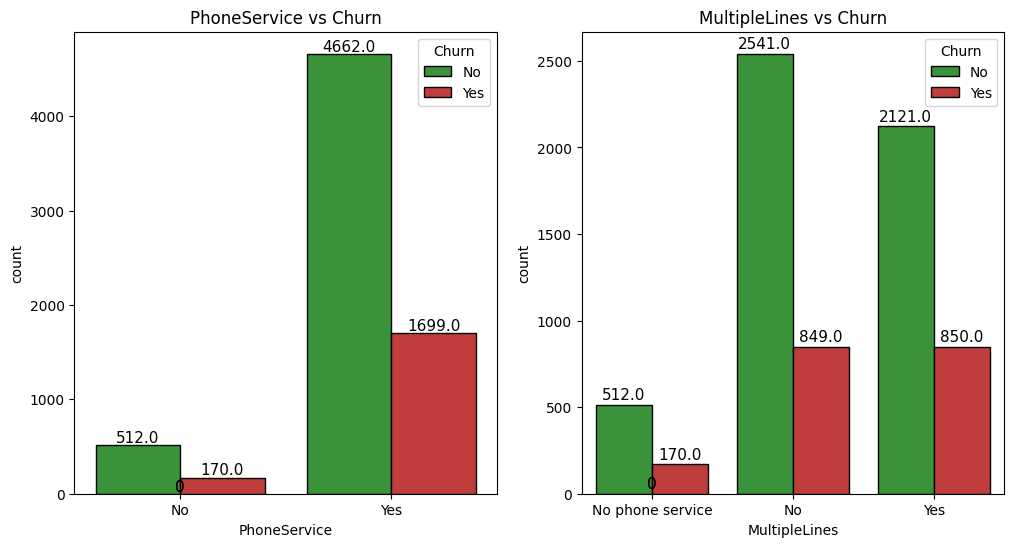

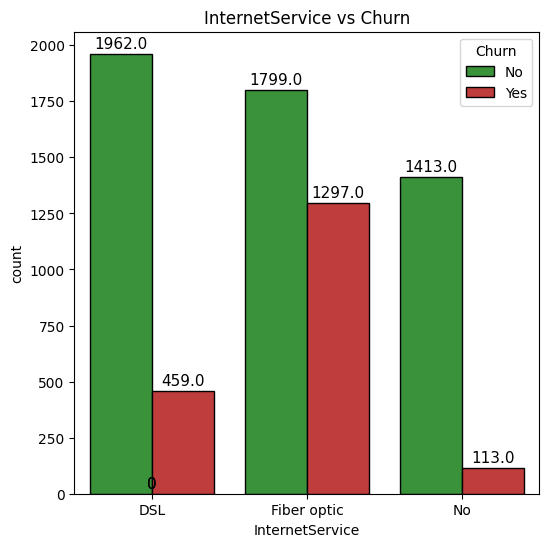

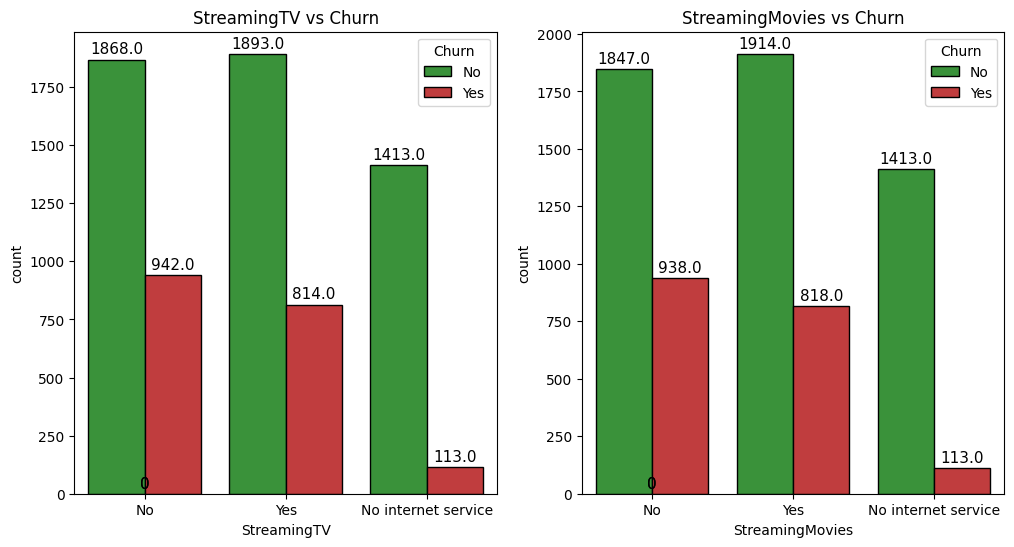

In [8]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,6))

for i in range(len(service_categories[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=service_categories[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 30, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = service_categories[i] + ' vs Churn'
    plt.title(title)

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6))

plt.subplot(1,1,1)
ax = sns.countplot(x=service_categories[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 25, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = service_categories[2] + ' vs Churn'
plt.title(title)
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,6))

for i in range(len(service_categories[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.countplot(x=service_categories[i + 3],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 25, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = service_categories[i + 3] + ' vs Churn'
    plt.title(title)

- **PhoneService Analysis:**
  Notably, a higher retention rate is observed among customers with no phone service compared to those who opted to discontinue the service.

- **MultipleLines Impact:**
  The churn rate appears consistent irrespective of whether customers have subscribed to multiple lines or not.

- **InternetService Preferences:**
  A considerable number of customers exhibit a preference against utilizing Fiber optic cables for InternetService. Conversely, the data suggests a greater inclination towards DSL among customers.

- **Insights on Streaming Services:**
  Both StreamingTV and StreamingMovies exhibit parallel churn patterns. Regardless of subscription status, a noteworthy number of customers have experienced churn. This implies that factors beyond streaming content alone contribute to customer disengagement.

These observations shed light on customer behavior concerning the services they avail, offering valuable insights for devising targeted strategies to enhance customer retention.

### Group 2: Customer-Enlisted Services

This category comprises features related to security and support services subscribed by the customer:

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**

Exploring these attributes will provide insights into how customers engage with security and support services, guiding the development of strategies to enhance customer satisfaction and retention.

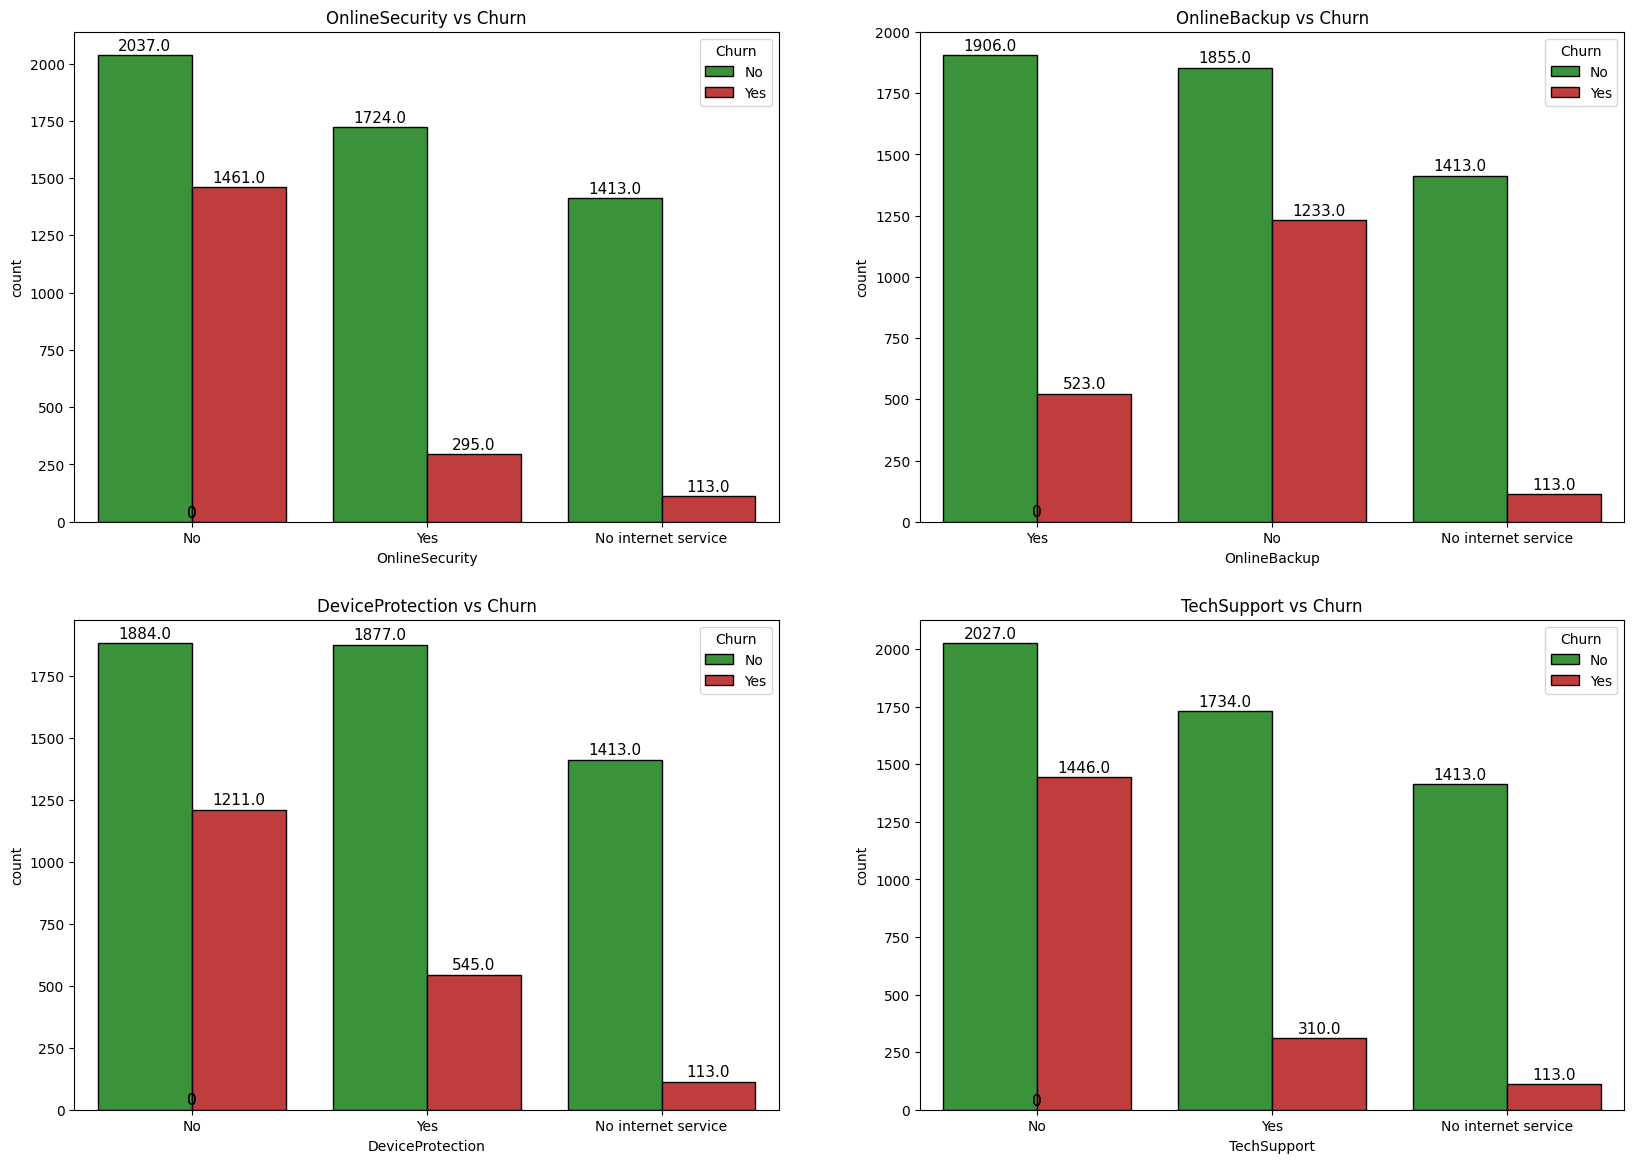

In [8]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(service_categories[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.countplot(x=service_categories[-4 + i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = service_categories[-4 + i] + ' vs Churn'
    plt.title(title)


The visualizations indicate the critical importance of services related to `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, and `TechSupport` in retaining customers. A notable number of customers have opted to switch service providers, emphasizing the significance of providing robust and satisfactory services in these areas. These findings underscore the need for focused efforts in improving and promoting these services to enhance overall customer satisfaction and retention.

### Group 3 : Customer Billing Information

This group encompasses features related to contractual terms, billing preferences, and payment methods:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes will provide insights into customer preferences regarding contractual commitments, billing processes, and payment methods, guiding strategies for optimizing customer satisfaction and retention.

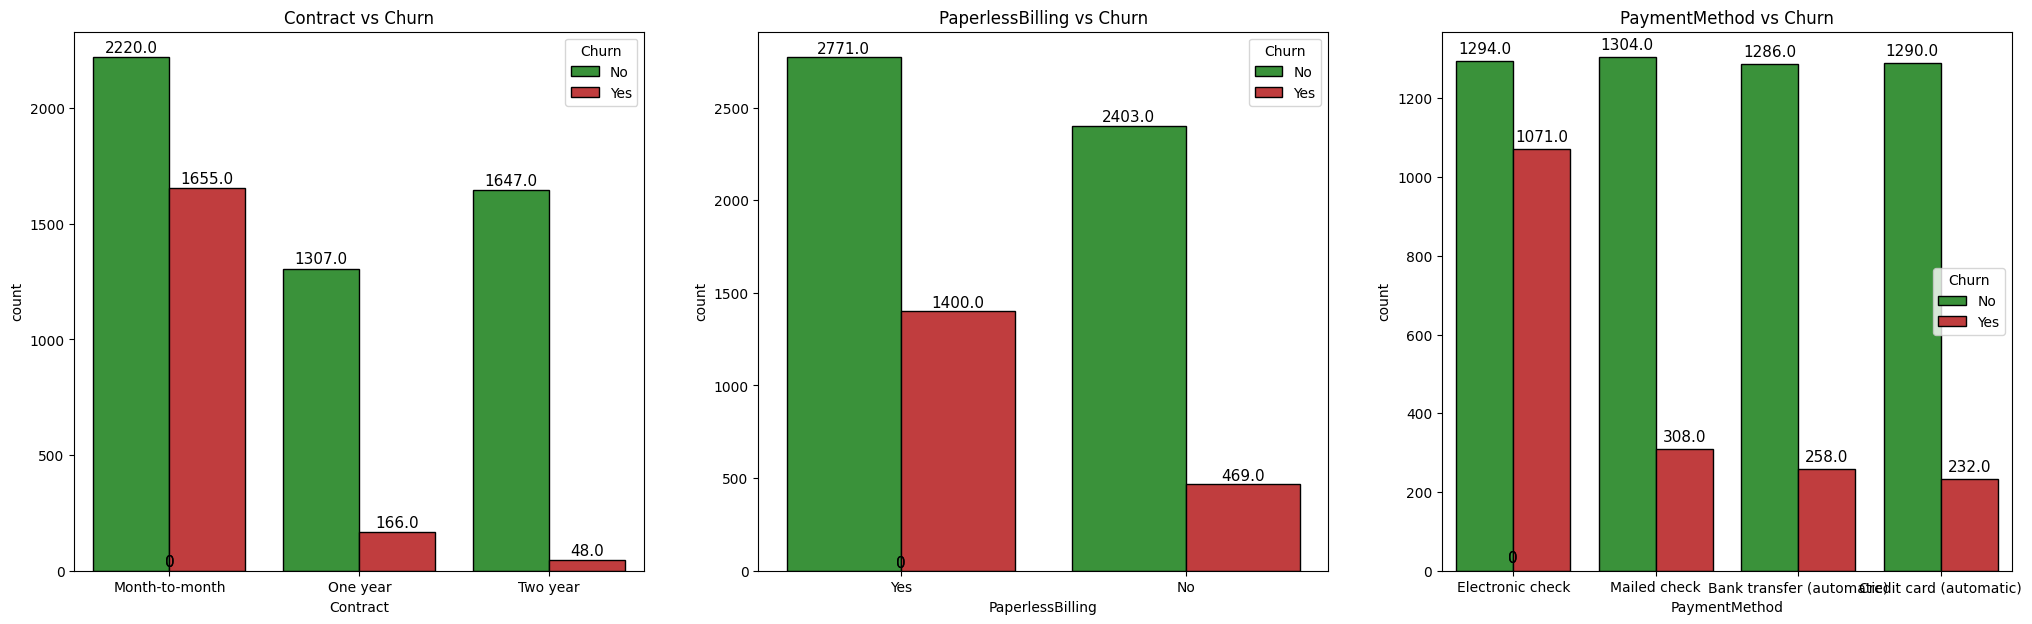

In [9]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

plt.subplot(1,3,1)
ax = sns.countplot(x=billing_categories[0],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = billing_categories[0] + ' vs Churn'
plt.title(title)

plt.subplot(1,3,2)
ax = sns.countplot(x=billing_categories[1],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = billing_categories[1] + ' vs Churn'
plt.title(title)

plt.subplot(1,3,3)
ax = sns.countplot(x=billing_categories[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
for rect in ax.patches:
     ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 20, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = billing_categories[2] + ' vs Churn'
plt.title(title)
plt.show()


- **Contract Analysis:**
  Customer churn is notably high for Month-to-Month contracts. This could be attributed to customers testing various services and opting for shorter-term commitments to explore available options or save costs.

- **PaperlessBilling Impact:**
  A considerable number of customers experience churn in the presence of PaperlessBilling, suggesting potential issues related to payment or receipt processes.

- **PaymentMethod Insights:**
  Customers exhibit a strong aversion to the Electronic check payment method. Of the 2365 bills paid using Electronic check, a significant 1071 customers chose to discontinue services. Addressing issues with Electronic check or reconsidering its inclusion may be necessary for improved customer satisfaction.

These observations underscore the importance of understanding customer preferences in contractual terms, billing methods, and payment processes. Implementing measures to address specific pain points can contribute significantly to customer retention efforts.

### Analysis of Categorical Features in Relation to Churn Cases

This investigation centers on examining the impact of categorical features specifically concerning customers who have experienced churn. The goal is to discern patterns, correlations, and influential factors among these categorical features within the context of churn cases. The findings from this analysis will provide valuable insights for optimizing strategies aimed at customer retention.


### Group 1: Customer Information

In this grouping, we explore the relationship between customer information and churn cases, focusing on the following categorical features:

- **Gender**
- **SeniorCitizen**
- **Partner**
- **Dependents**

This analysis aims to uncover patterns and associations within these specific customer attributes concerning instances of customer churn.

In [10]:
# Calculating the percentage distribution of categories by churn
gender = df[df['Churn'] == 'Yes']['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df[df['Churn'] == 'Yes']['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df[df['Churn'] == 'Yes']['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df[df['Churn'] == 'Yes']['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

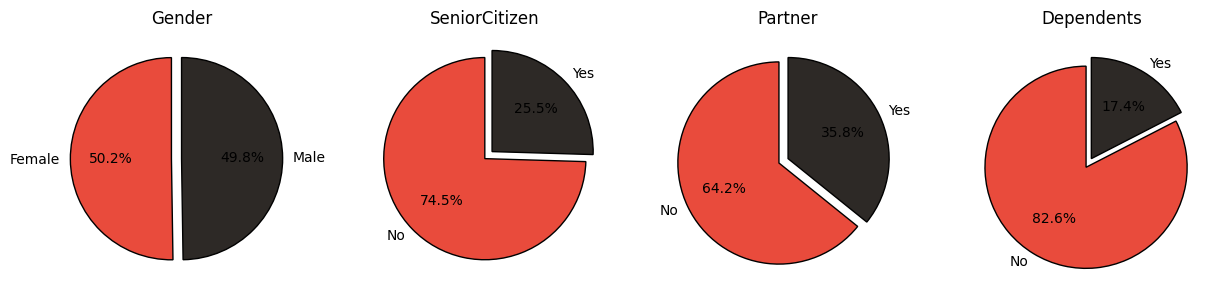

In [11]:
colors = ['#E94B3C','#2D2926']
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender')

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen')

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner')

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents')

plt.show()

- **Gender Analysis:**
  A distinct 50% - 50% split is observed between male and female customers who have switched services. This suggests that the reasons for switching are likely related to service quality or specific processes that elicited negative reactions from customers.

- **SeniorCitizen Impact:**
  A substantial 75% of churned customers are not classified as SeniorCitizens. This highlights a critical area where the company should focus its attention for customer retention strategies.

- **Living Arrangements Influence:**
  Customers living independently, without partners or dependents, have prominently discontinued services. The data indicates that, on average, 73.4% of customers who churned were living independently.

These insights provide a targeted understanding of how specific customer information attributes relate to instances of churn. Addressing these aspects can contribute significantly to the development of effective customer retention initiatives.

### Group 2: Customer-Enlisted Services

In this grouping, we investigate the relationship between services subscribed by the customer and instances of churn. The focus is on the following categorical features:

- **PhoneService**
- **MultipleLines**
- **InternetService**
- **StreamingTV**
- **StreamingMovies**

This analysis aims to uncover patterns and correlations within these specific service-related attributes concerning cases of customer churn.

In [12]:
phoneservice = df[df['Churn'] == 'Yes']['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df[df['Churn'] == 'Yes']['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df[df['Churn'] == 'Yes']['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df[df['Churn'] == 'Yes']['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df[df['Churn'] == 'Yes']['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

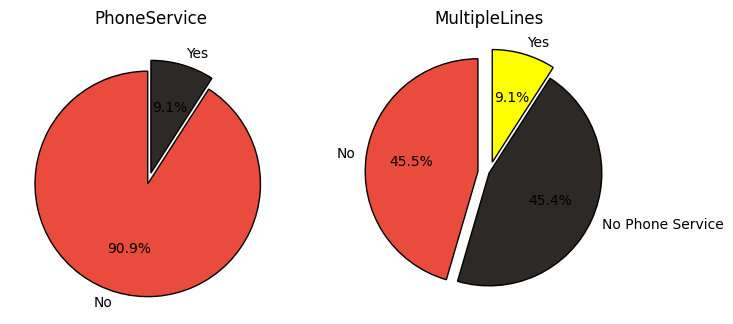

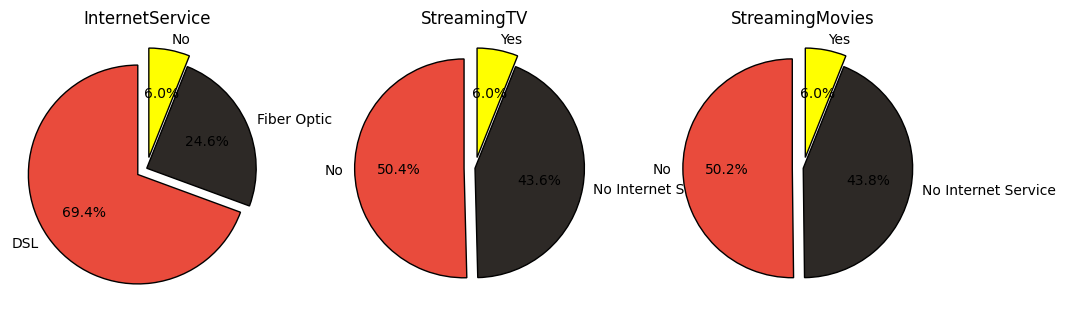

In [13]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService')

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines')

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService')

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV')

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies')
plt.show()

- **PhoneService Impact:**
  Despite the provision of PhoneService, a significant percentage of customers switched, suggesting dissatisfaction or other service-related issues.

- **MultipleLines Influence:**
  The availability of MultipleLines did not significantly affect customer unsubscription, indicating its limited impact on churn.

- **InternetService Preferences:**
  A notable 70% of customers opted out from services involving Fiber Optic cables for InternetService, signaling a strong preference against this technology.

- **Streaming Services Insights:**
  While customers without StreamingTV and StreamingMovies services tended to cancel their subscriptions, an average of 43.7% of customers with these services switched. This suggests that other factors beyond streaming content contribute to customer churn.

### Group 2: Customer-Enlisted Services
In this grouping, we investigate the relationship between security and support services subscribed by the customer and instances of churn. The focus is on the following categorical features:

- **OnlineSecurity**
- **OnlineBackup**
- **DeviceProtection**
- **TechSupport**

This analysis aims to uncover patterns and correlations within these specific security and support service-related attributes concerning cases of customer churn.

In [14]:
onlinesecurity = df[df['Churn'] == 'Yes']['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df[df['Churn'] == 'Yes']['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df[df['Churn'] == 'Yes']['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df[df['Churn'] == 'Yes']['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

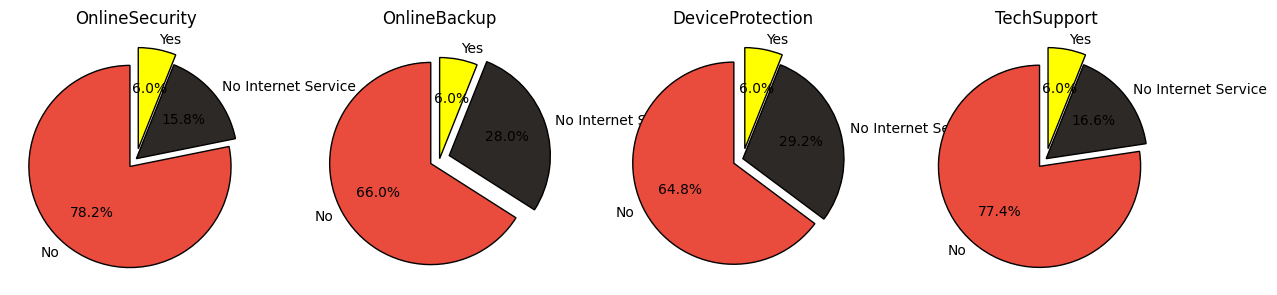

In [15]:
colors = ['#E94B3C','#2D2926' , '#FFFF00' ]
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity')

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup')

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection')

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport')
plt.show()

The pie charts above underscore the critical importance of providing OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport services. On average, a substantial 71.6% of customers terminated their services due to the absence of these essential features. This highlights a clear correlation between the provision of robust security and support services and customer retention, emphasizing the need for strategic enhancements in these areas.

### Group 3

This grouping delves into the relationship between contract terms, billing preferences, and payment methods selected by the customer, specifically in the context of instances of churn. The categorical features under scrutiny are:

- **Contract**
- **PaperlessBilling**
- **PaymentMethod**

Analyzing these attributes aims to reveal patterns and correlations within these specific contractual and financial service-related features concerning cases of customer churn.

In [16]:
contract = df[df['Churn'] == 'Yes']['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df[df['Churn'] == 'Yes']['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df[df['Churn'] == 'Yes']['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

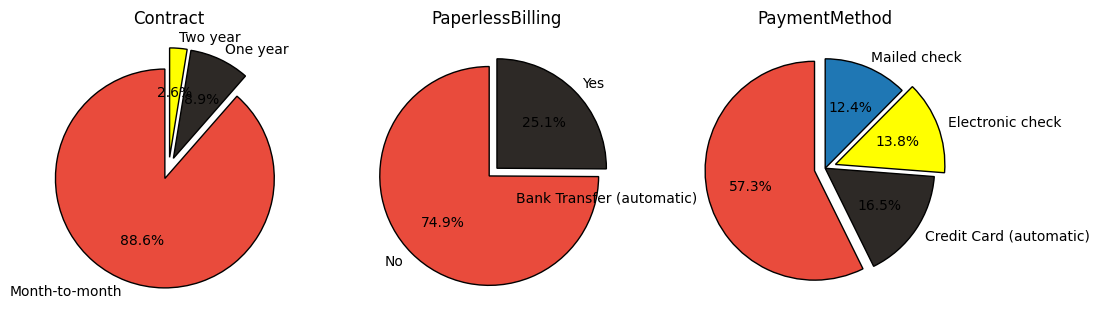

In [17]:
colors = ['#E94B3C', '#2D2926', '#FFFF00', '#1F77B4']
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract')

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling')

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod')
plt.show()

- **Contract Duration Impact:**
  Monthly contracts dominate customer churn, with a substantial 88.6% share. This highlights the need to explore alternatives or incentives for longer-term commitments.

- **PaperlessBilling Analysis:**
  PaperlessBilling does not garner positive sentiment among customers, evident from the significant churn associated with this billing method.

- **PaymentMethod Insights:**
  Electronic check emerges as a significant concern, contributing to 57.3% of churn. Addressing issues with this payment method is crucial. Mailed check, Bank Transfer (automatic), and Credit Card (automatic) follow, necessitating attention to improve the overall payment experience for customers.

These findings provide actionable insights for refining contract terms, billing preferences, and payment methods to enhance customer satisfaction and retention.

## Numerical Features Distribution
In this analysis, we explore the distribution of numerical features to gain insights into the spread and characteristics of quantitative attributes in the dataset. Before this we remove few column those are either unncessary or created using formula for model development.

In [18]:
numerical_features.remove('customerID') #unnecessary column
numerical_features.remove('ChargeRatio') #Statistical features
numerical_features.remove('ServicesCount') #Statistical features

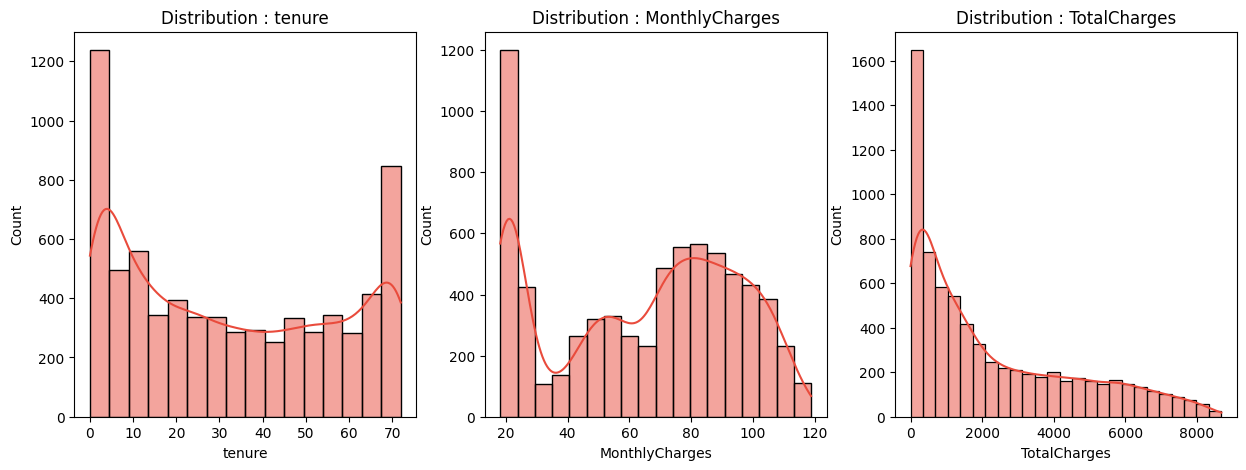

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i in range(len(numerical_features)):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[numerical_features[i]], kde=True, color=colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

- **Tenure Distribution:**
  The tenure distribution exhibits a bimodal pattern with peaks at 0-70, indicating the presence of two distinct groups within the customer base.

- **MonthlyCharges Distribution:**
  MonthlyCharges create a bimodal distribution with peaks at 20-80, suggesting the existence of two prevalent cost structures or service tiers.

- **TotalCharges Distribution:**
  TotalCharges displays a positively or rightly skewed distribution, indicating a concentration of lower values with a gradual tapering towards higher values.

These numerical feature distributions provide valuable insights into the varied patterns within customer tenure, monthly charges, and total charges. Understanding these distributions aids in refining strategies for customer segmentation and engagement.

### Target Variable (Churn) in Relation to Numerical Features

Text(0.5, 1.0, 'Monthly Charges VS Churn Distribution')

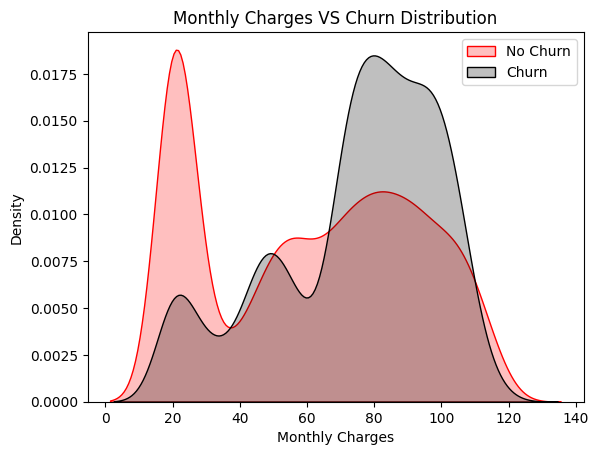

In [20]:
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Black", shade= True)
ax.legend(['No Churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Monthly Charges VS Churn Distribution')

Customers are more likely to churn due to the presence of high monthly charges.

Text(0.5, 1.0, 'Total Charges VS Churn Distribution')

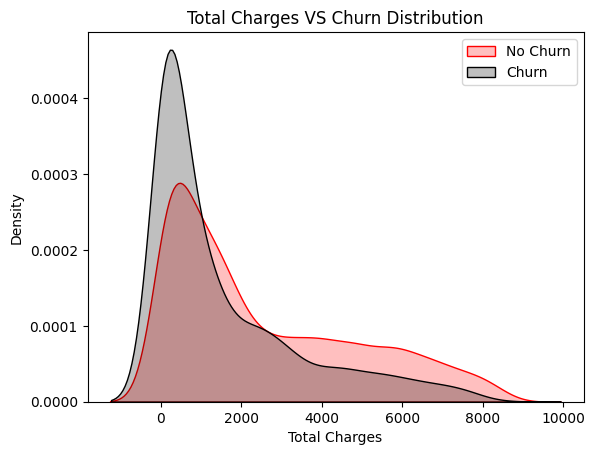

In [21]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="red", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="black", shade= True)
ax.legend(['No Churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Total Charges VS Churn Distribution')

The observation that high Total Charges are associated with a higher likelihood of customer churn suggests a potential issue with the pricing system. Addressing and optimizing the pricing structure is crucial to mitigate this factor contributing to customer churn. A thorough examination and potential adjustments in pricing strategies may help enhance customer satisfaction and retention.

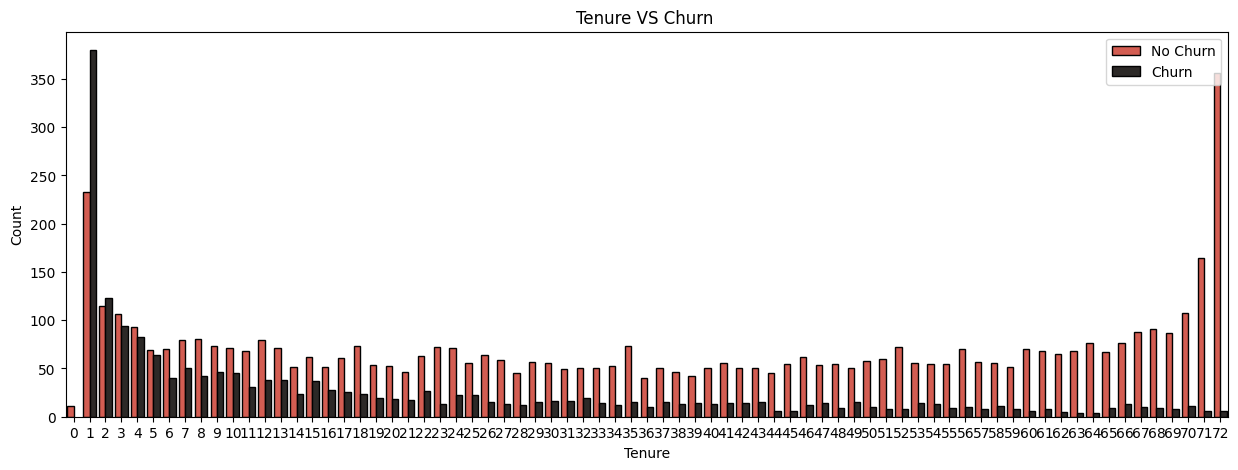

In [22]:
plt.figure(figsize = (15,5))
sns.countplot(x='tenure', data=df, hue='Churn', palette = colors, edgecolor='black')
plt.title('Tenure VS Churn ')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.legend(['No Churn','Churn'], loc='upper right')
plt.show()

- **Tenure Analysis:**
  A substantial number of customers exit within the first month, with high cancellations continuing for 4-5 months. However, churn numbers decrease as tenure increases. The graph exhibits a symmetrical pattern, with the left side dominated by high churn numbers and the right side characterized by lower churn numbers. This highlights a correlation between longer customer tenure and reduced likelihood of churn. Understanding and leveraging this trend can inform strategies to enhance customer retention over time.

### Quantitative features vs. Quantitative features with respect to the Target Variable (Churn)

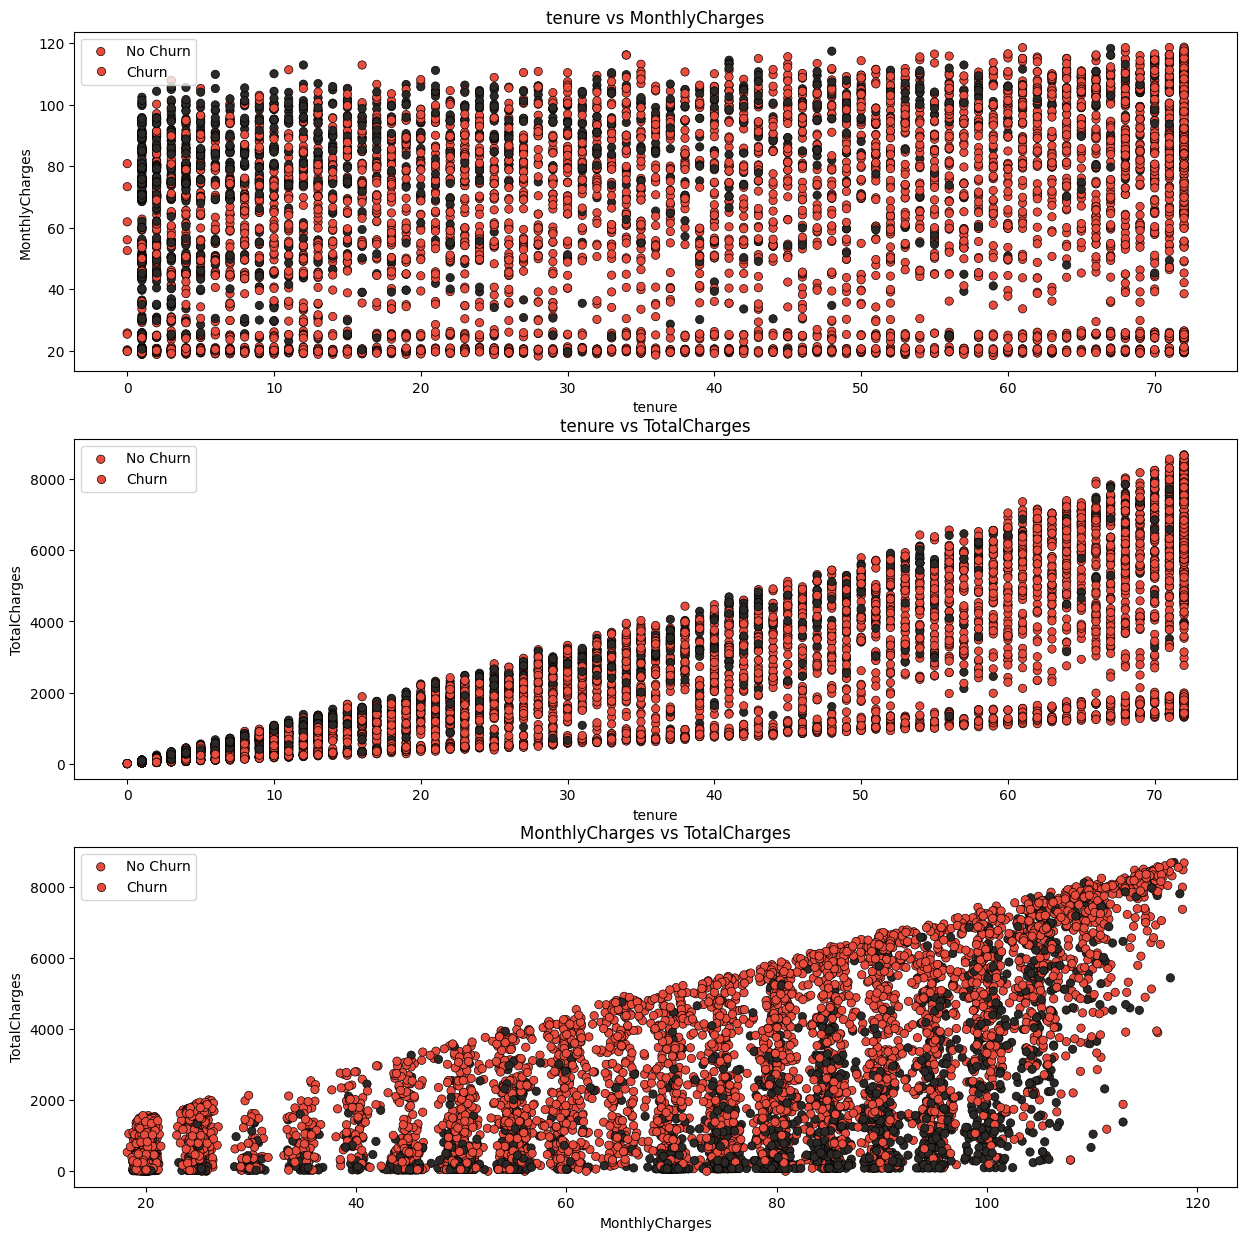

In [23]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = numerical_features[i],y = numerical_features[j],data = df,hue = 'Churn',palette = colors,edgecolor = 'black')
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

- **Tenure and MonthlyCharges Relationship:**
  - For tenure within the 0-20 months period, customer churn occurs across various MonthlyCharges values.
  - From 20-60 months tenure, customers with higher MonthlyCharges values (70-120) exhibit an increased likelihood of dropping out.

- **TotalCharges vs Tenure:**
  - As tenure increases, TotalCharges also increase, indicating a positive correlation.
  - Customers opting out are typically those charged the highest within their tenure period, along with some in the middle range.

- **MonthlyCharges Threshold:**
  - Customers tend to decide to cancel their subscriptions when MonthlyCharges reach 70 and above.

These insights emphasize the nuanced relationships between tenure, MonthlyCharges, and TotalCharges, providing valuable information for optimizing pricing strategies and customer retention efforts.

# Overview of Exploratory Data Analysis

In customer churn analysis, certain categorical features reveal distinct hierarchies crucial for targeted retention strategies. **Male** customers are more likely to churn than females, while **SeniorCitizens** exhibit lower churn rates. Not having a **partner** or **dependents** increases churn likelihood. Regarding services, having **phone service** and **multiple lines** correlates with lower churn, and **fiber optic** internet users are more prone to churn than DSL users. The absence of online security, online backup, etc., indicates higher churn.

Contract-wise, **month-to-month** contracts show higher churn than one-year and two-year contracts. **PaperlessBilling** customers are more likely to churn. In payment methods, **electronic checks** users have a higher churn risk, followed by mailed checks, bank transfers (automatic), and credit cards (automatic). Understanding these hierarchies is essential for devising effective retention strategies.